#  Manually Constructed the Estimation Procedure of the Ordered Logit Model
Manually constructed the procedure for estimating the regression coefficients of the ordered logit model using the Maximum Likelihood Estimation (MLE) method and wrapped it with a class that allows adding more covariates, performing model selection between ordered probit and logit, and changing the range of the ordered outcome variable.

First few rows of the dataset:
   lifesat  sleephr
0        1        7
1        0        7
2        2        7
3        1        8
4        3        7

Descriptive statistics:
        lifesat    sleephr
count  66.00000  66.000000
mean    2.19697   7.545455
std     0.96428   0.826146
min     0.00000   5.000000
25%     2.00000   7.000000
50%     2.00000   8.000000
75%     3.00000   8.000000
max     4.00000  10.000000


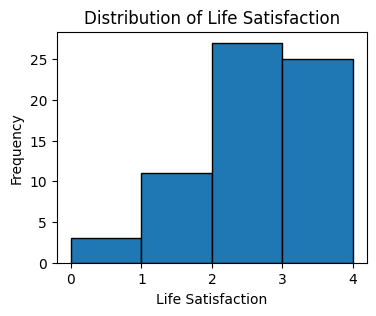

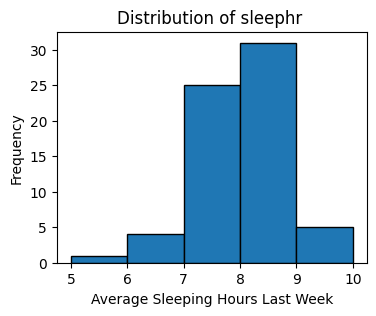

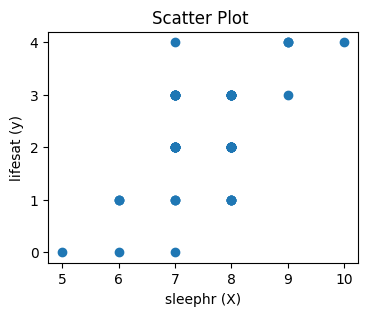


Summary of Findings:
The dataset contains 66 observations.
The descriptive statistics provide an overview of the data's central tendency, dispersion, and distribution.
The histogram  shows the frequency distribution of two variables and we can see them approximately normal.
The scatter plot helps visualize the relationship between the dependent and independent variables and we can see they have a positive correlation
Further analysis and modeling can be performed based on these preliminary results.


In [1]:
# read dataset and do the descriptive analysis
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset
data = pd.read_stata('E:/Users/Chenxi/Documents/GitHub/2023comprog/ologit/data_lifesat.dta')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Compute descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Extract predictor variable(s) and response variable
X = data['sleephr']  # Specify the column names for the predictor variables
y = data['lifesat']

# Convert data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# create a canvas
plt.figure(figsize=(4, 3))

# custom the bin edges
bin_edges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

# Plot the histogram with custom bin edges
plt.hist(data['lifesat'], bins='auto', edgecolor='black')

# Set labels and title
plt.xlabel('Life Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Life Satisfaction')

# Display the plot
plt.show()

# same process as the previous text
plt.figure(figsize=(4, 3))

plt.hist(X,bins='auto', edgecolor='black')

plt.xlabel('Average Sleeping Hours Last Week')
plt.ylabel('Frequency')
plt.title('Distribution of sleephr ')

plt.show()

# Create a scatter plot of the dependent variable vs. the independent variable
plt.figure(figsize=(4, 3))
plt.scatter(X, y)
plt.xlabel('sleephr (X)')
plt.ylabel('lifesat (y)')
plt.title('Scatter Plot ')
plt.show()

# Summary of findings
print("\nSummary of Findings:")
print("The dataset contains", len(data), "observations.")
print("The descriptive statistics provide an overview of the data's central tendency, dispersion, and distribution.")
print("The histogram  shows the frequency distribution of two variables and we can see them approximately normal.")
print("The scatter plot helps visualize the relationship between the dependent and independent variables and we can see they have a positive correlation")
print("Further analysis and modeling can be performed based on these preliminary results.")

In [2]:
# invoke the Stata and ordered model package to create a beta benchmark 
from statsmodels.miscmodels.ordinal_model import OrderedModel
import time

x = data['sleephr'] 
y = data['lifesat']
def orderedprobit(x,y):
    mod_probit=OrderedModel(y,x)
    res_probit=mod_probit.fit()
    
    cutoff_point = mod_probit.transform_threshold_params(res_probit.params[-4:])
    
    return cutoff_point[1:5], res_probit.summary()


results = orderedprobit(x,y)


print(results)

Optimization terminated successfully.
         Current function value: 1.200677
         Iterations: 282
         Function evaluations: 454
(array([4.1199742 , 5.29586961, 6.54224942, 7.8905311 ]), <class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
Dep. Variable:                lifesat   Log-Likelihood:                -79.245
Model:                   OrderedModel   AIC:                             168.5
Method:            Maximum Likelihood   BIC:                             179.4
Date:                Sun, 19 Oct 2025                                         
Time:                        19:57:09                                         
No. Observations:                  66                                         
Df Residuals:                      61                                         
Df Model:                           1                                         
                 coef    std err          z


The estimation of $(\beta,\mu_{0},\mu_{1},\mu_{2},\mu_{3})$ is about (0.82,4.12,0.16,0.22,0.30)


C:\Users\Chenxi\AppData\Local\Temp\ipykernel_85296\3318388917.py:20: RuntimeWarning: divide by zero encountered in log
  part4=(np.log(stats.norm.cdf(np.inf-BX[y==4])-stats.norm.cdf(mu4-BX[y==4])))
e:\Users\Chenxi\Documents\GitHub\2023comprog\.conda\Lib\site-packages\scipy\optimize\_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


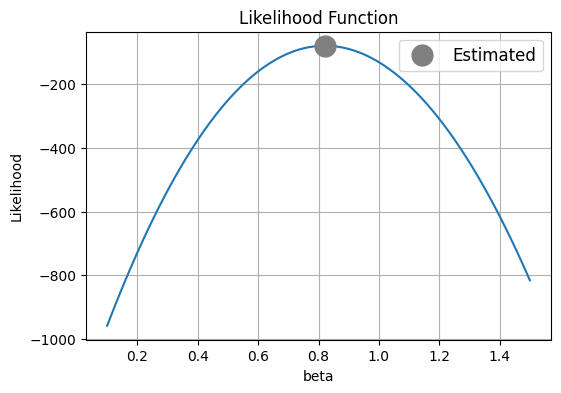

In [3]:
# construct the maxmized likelihood function process to estmate beta
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.optimize import minimize

# define maximam function
def oprobit(theta):
    beta=theta[0]
    BX = x*beta
    mu1=theta[1]
    mu2=theta[2]
    mu3=theta[3]
    mu4=theta[4]
    output=np.copy(y)
    part0=(np.log(stats.norm.cdf(mu1-BX[y==0])-stats.norm.cdf(-np.inf-BX[y==0])))
    part1=(np.log(stats.norm.cdf(mu2-BX[y==1])-stats.norm.cdf(mu1-BX[y==1])))
    part2=(np.log(stats.norm.cdf(mu3-BX[y==2])-stats.norm.cdf(mu2-BX[y==2])))
    part3=(np.log(stats.norm.cdf(mu4-BX[y==3])-stats.norm.cdf(mu3-BX[y==3])))
    part4=(np.log(stats.norm.cdf(np.inf-BX[y==4])-stats.norm.cdf(mu4-BX[y==4])))
    return -(part0.sum()+part1.sum()+part2.sum()+part3.sum()+part4.sum())

# define initial guess
initialvalue = np.array([0.8,4,5,6,7])

# use scipy's optimize.minimize method.
start_time = time.time()
results = minimize(oprobit,initialvalue)
end_time = time.time()
run_time = end_time - start_time

estimation = results.x

beta_values = np.linspace(0.1,1.5,100)
likelihood_values = []
for beta in beta_values:
    likelihood_values.append(-oprobit(np.array([beta,estimation[1],estimation[2],estimation[3],estimation[4]])))
    
plt.figure(figsize=(6,4))
plt.plot(beta_values, likelihood_values)
plt.plot(estimation[0], -oprobit(estimation),'o', color='gray', ms=15, label='Estimated')
plt.xlabel('beta')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend(loc=0, fontsize=12)
plt.grid(True)
plt.show()

The result from the MLE process show that when $\beta$ is about 0.82, the likelihood will be the greatest. It is consistent to the Stata process.

#### Add Richer Functionalities to the MLE Process

- Inclusion of covariates
- selection of range of dependent variable series values
- model selection

In [ ]:
## Add additional independent variables [independent_var1, independent_var2, ...]
X = data[['sleephr', 'independent_var1', 'independent_var2']]  
y = data['lifesat']

## Adjust the number of ordinal values
num_values = 5 

## Choose [logit] or [probit] model
model_type = 'logit'

X = np.copy(X.to_numpy())
y = np.copy(y.to_numpy())

# Define maximum likelihood function
def ordered_model(theta):
    beta = theta[0]
    BX = np.dot(X, beta)  # Multiply beta with X for multiple independent variables
    mus = theta[1:]
    output = np.copy(y)
    log_likelihood = 0

    for i in range(num_values):
        if i == 0:
            part = np.log(special.expit(mus[i] - BX[y == i]))
        elif i == num_values - 1:
            part = np.log(1 - special.expit(mus[i - 1] - BX[y == i]))
        else:
            part = np.log(special.expit(mus[i] - BX[y == i]) - special.expit(mus[i - 1] - BX[y == i]))

        log_likelihood += part.sum()

    return -log_likelihood

# Define initial guess
initial_value = np.zeros(X.shape[1] + num_values - 1)  # Adjust the size of initial value based on the number of variables

start_time = time.time()

# Perform optimization
results = minimize(ordered_model, initial_value)

end_time = time.time()
run_time = end_time - start_time
print(results)
print(run_time)
estimation = results.x

# Define beta range
beta_values = np.linspace(0.1, 1.5, 100)

likelihood_values = []
for beta in beta_values:
    likelihood_values.append(-ordered_model(np.insert(estimation[1:], 0, beta)))  # Insert beta in the appropriate position

plt.figure(figsize=(8, 5))
plt.plot(beta_values, likelihood_values)
plt.plot(estimation[0], -ordered_model(estimation), 'o', color='gray', ms=15, label='Estimated')
plt.xlabel('beta')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend(loc=0, fontsize=12)
plt.grid(True)
plt.show()

# Report estimates in a formatted table
estimates_df = pd.DataFrame({
    'Variables': ['Intercept'] + ['independent_var{}'.format(i+1) for i in range(X.shape[1])],
    'Estimates': estimation[:X.shape[1]]
})

# Add standard errors, confidence intervals, and z-statistics if available

print(estimates_df)

#### Package Code

In [ ]:
from scipy import stats, special
from scipy.optimize import minimize

class OrdinalResponseModel:
    def __init__(self, data, independent_vars, num_values=5, model_type='logit'):
        self.data = data
        self.independent_vars = independent_vars
        self.num_values = num_values
        self.model_type = model_type
        self.X = None
        self.y = None
        self.estimation = None
        self.results = None
        self.run_time = None

    def preprocess_data(self):
        self.X = np.copy(self.data[self.independent_vars].to_numpy())
        self.y = np.copy(self.data['lifesat'].to_numpy())

    def ordered_model(self, theta):
        beta = theta[0]
        BX = np.dot(self.X, beta)
        mus = theta[1:]
        output = np.copy(self.y)
        log_likelihood = 0

        for i in range(self.num_values):
            if i == 0:
                part = np.log(special.expit(mus[i] - BX[self.y == i]))
            elif i == self.num_values - 1:
                part = np.log(1 - special.expit(mus[i - 1] - BX[self.y == i]))
            else:
                part = np.log(special.expit(mus[i] - BX[self.y == i]) - special.expit(mus[i - 1] - BX[self.y == i]))

            log_likelihood += part.sum()

        return -log_likelihood

    def fit(self):
        self.preprocess_data()

        # Define initial guess
        initial_value = np.zeros(self.X.shape[1] + self.num_values - 1)

        start_time = time.time()

        # Perform optimization
        self.results = minimize(self.ordered_model, initial_value)

        end_time = time.time()
        self.run_time = end_time - start_time
        self.estimation = self.results.x

    def display_results(self):
        estimates_df = pd.DataFrame({
            'Variables': ['Intercept'] + self.independent_vars,
            'Estimates': self.estimation[:self.X.shape[1]]
        })
        
        # Add standard errors, confidence intervals, and z-statistics if available
        print(estimates_df)


# Example usage
data = pd.read_stata('data_lifesat.dta')
model = OrdinalResponseModel(data, ['sleephr', 'independent_var1', 'independent_var2'], num_values=5, model_type='logit')
model.fit()
model.display_results()